In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import pandas as pd
df = pd.read_csv('bfc.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461 entries, 0 to 6460
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nr. factura      6461 non-null   int64  
 1   Data factura     6461 non-null   object 
 2   Client           6461 non-null   object 
 3   Suma factura     6461 non-null   float64
 4   Baza impozitare  6461 non-null   float64
 5   Valoare TVA      6461 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 303.0+ KB


In [ ]:
print(df.head())

   Nr. factura         Data factura                                   Client  \
0        53962  02.05.2014 00:00:00                         MEGA AUTO S.R.L.   
1        53963  02.05.2014 00:00:00                              GIP EST SRL   
2        53964  05.05.2014 00:00:00  COLEGIUL NATIONAL DE ARTA OCTAV BANCILA   
3        53971  05.05.2014 00:00:00                       EPTISA ROMANIA SRL   
4        53972  08.05.2014 00:00:00                  PALATUL COPIILOR - IASI   

   Suma factura  Baza impozitare  Valoare TVA  
0         30.24            24.39         5.85  
1        407.51           328.64        78.87  
2         56.00            45.16        10.84  
3        270.44           218.10        52.34  
4        180.00           145.16        34.84  


In [ ]:
df.head()


,Nr. factura,Data factura,Client,Suma factura,Baza impozitare,Valoare TVA
0,53962,02.05.2014 00:00:00,MEGA AUTO S.R.L.,30.24,24.39,5.85
1,53963,02.05.2014 00:00:00,GIP EST SRL,407.51,328.64,78.87
2,53964,05.05.2014 00:00:00,COLEGIUL NATIONAL DE ARTA OCTAV BANCILA,56.00,45.16,10.84
3,53971,05.05.2014 00:00:00,EPTISA ROMANIA SRL,270.44,218.10,52.34
4,53972,08.05.2014 00:00:00,PALATUL COPIILOR - IASI,180.00,145.16,34.84


In [ ]:
#schimbam formatul datei pt pandas
df['Data factura'] = pd.to_datetime(df['Data factura'], format='%d.%m.%Y %H:%M:%S')


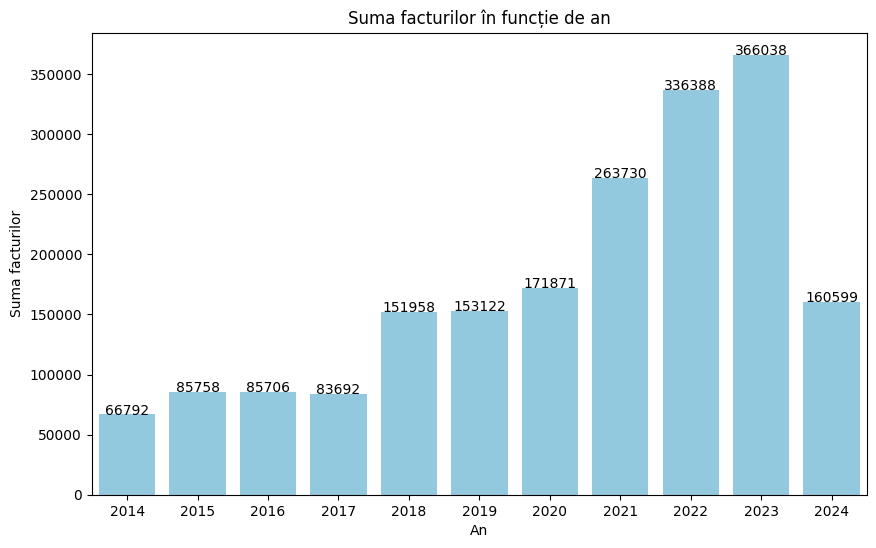

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=suma_facturi_pe_an, x='An factura', y='Suma factura', color='skyblue')
plt.title('Suma facturilor în funcție de an')
plt.xlabel('An')
plt.ylabel('Suma facturilor')

# Adăugăm valorile sumei facturilor pe fiecare bară
for index, row in suma_facturi_pe_an.iterrows():
    ax.text(row.name, row['Suma factura'], str(int(row['Suma factura'])), color='black', ha="center")

plt.show()


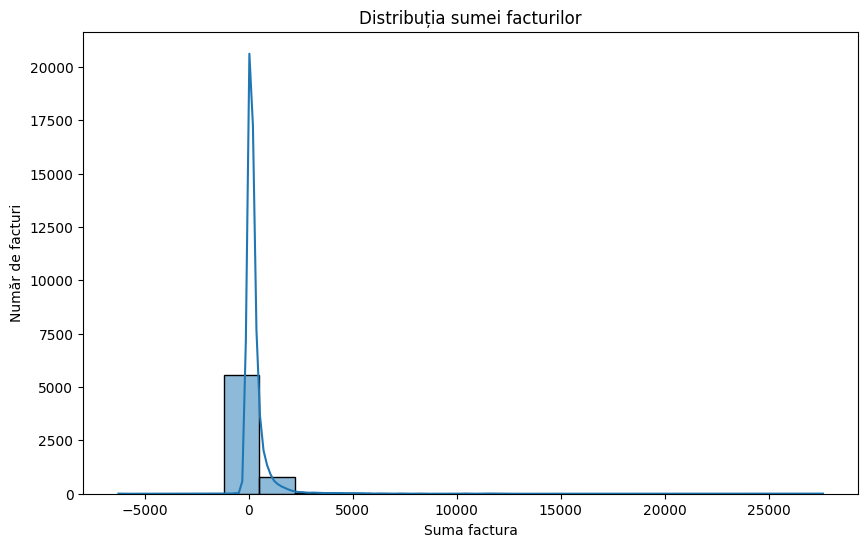

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Suma factura'], bins=20, kde=True)
plt.title('Distribuția sumei facturilor')
plt.xlabel('Suma factura')
plt.ylabel('Număr de facturi')
plt.show()


Graficul prezentat arată distribuția sumei facturilor, având pe axa orizontală sumele facturilor și pe axa verticală numărul de facturi.

Observăm că majoritatea facturilor se concentrează în jurul valorii zero, unde vedem un vârf foarte pronunțat, indicând o frecvență mare a facturilor cu sume foarte mici sau zero. Există de asemenea o mică frecvență pentru facturi cu valori negative, posibil reprezentând rambursări sau corecții.

După acest vârf pronunțat, numărul de facturi scade dramatic odată cu creșterea sumei facturii, sugerând că facturile cu sume mari sunt mult mai rare.

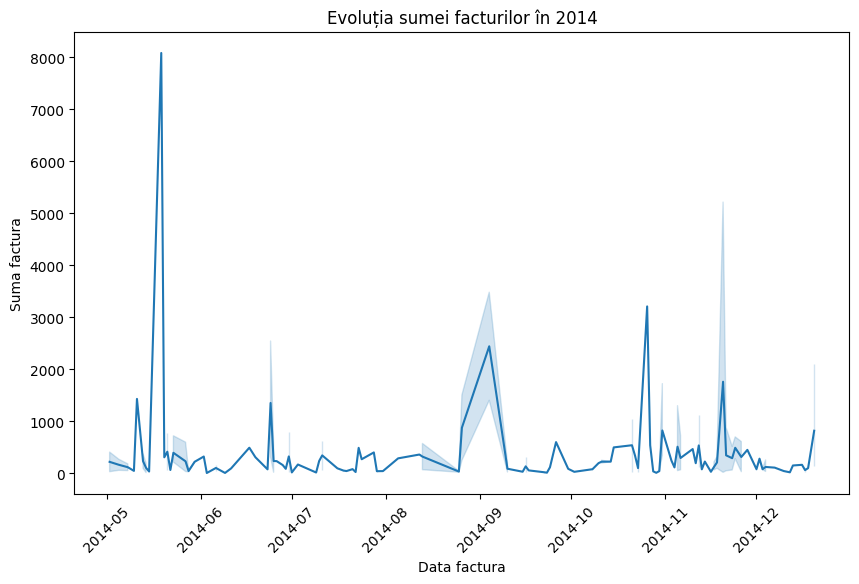

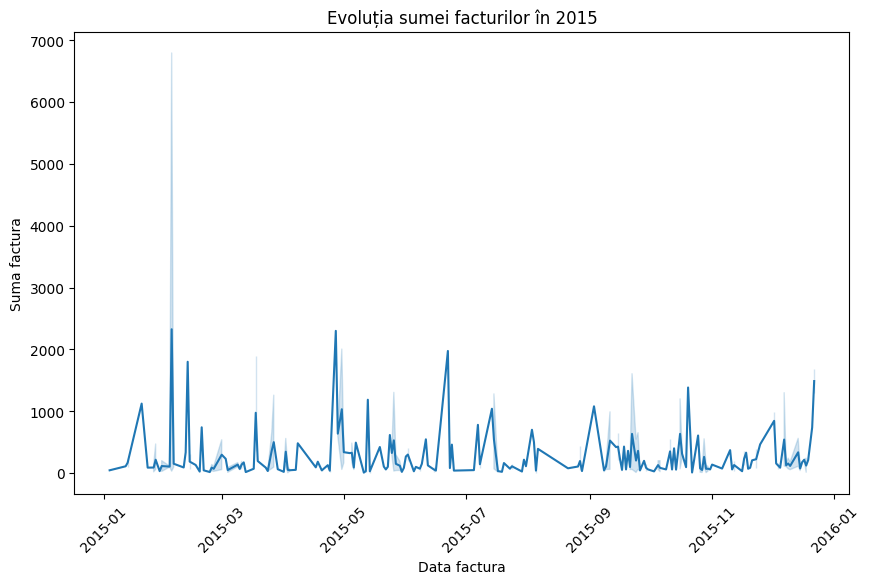

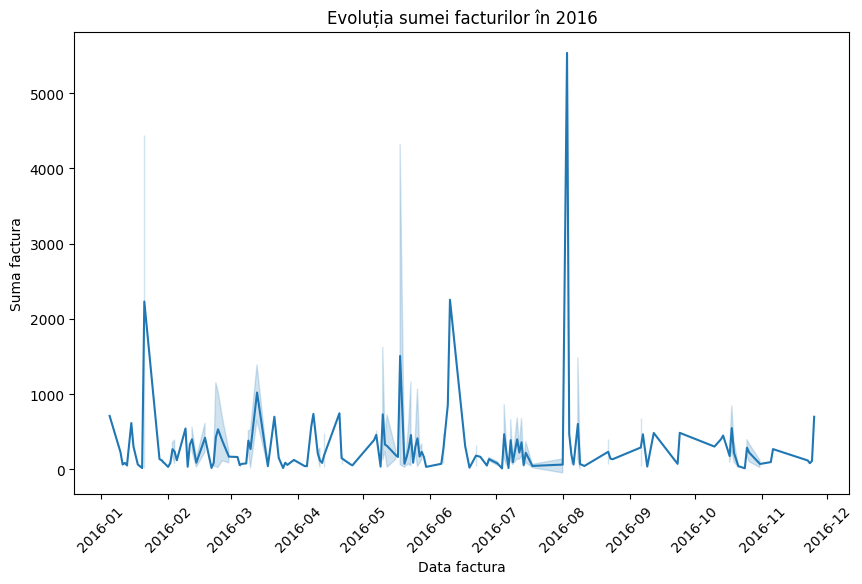

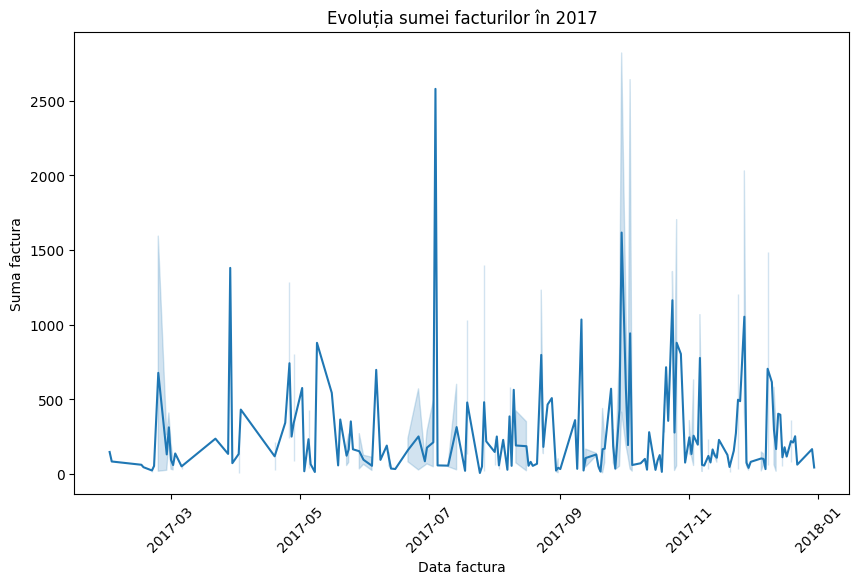

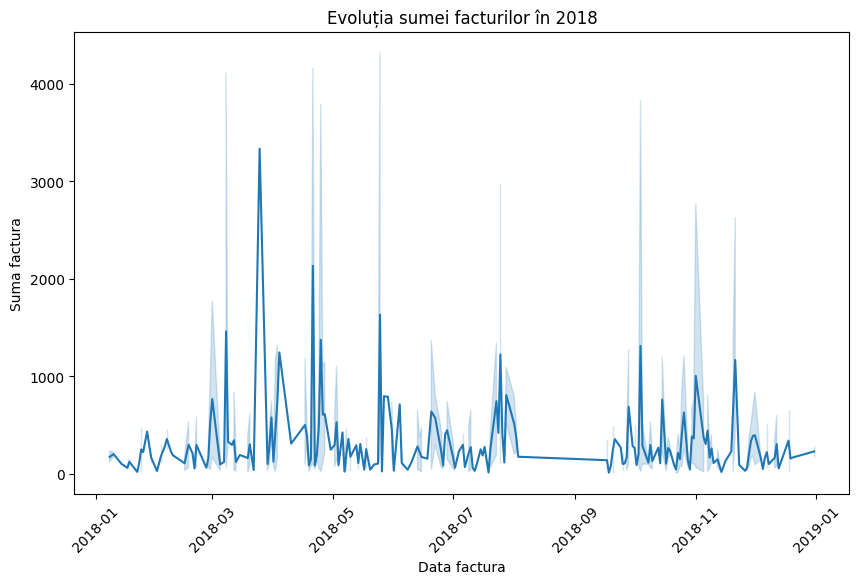

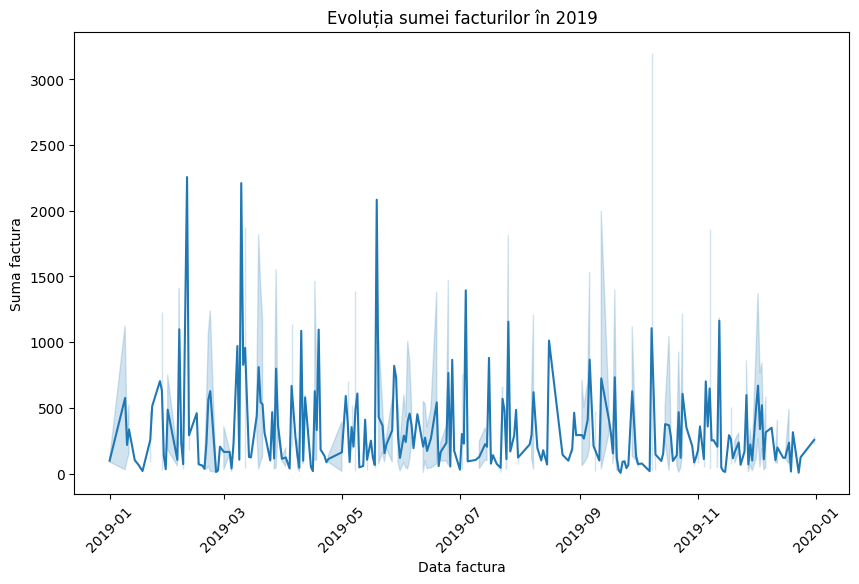

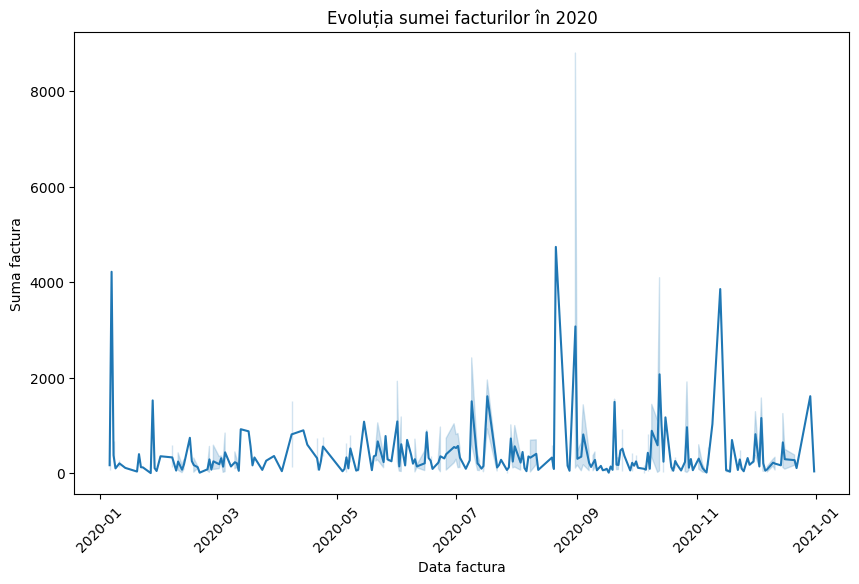

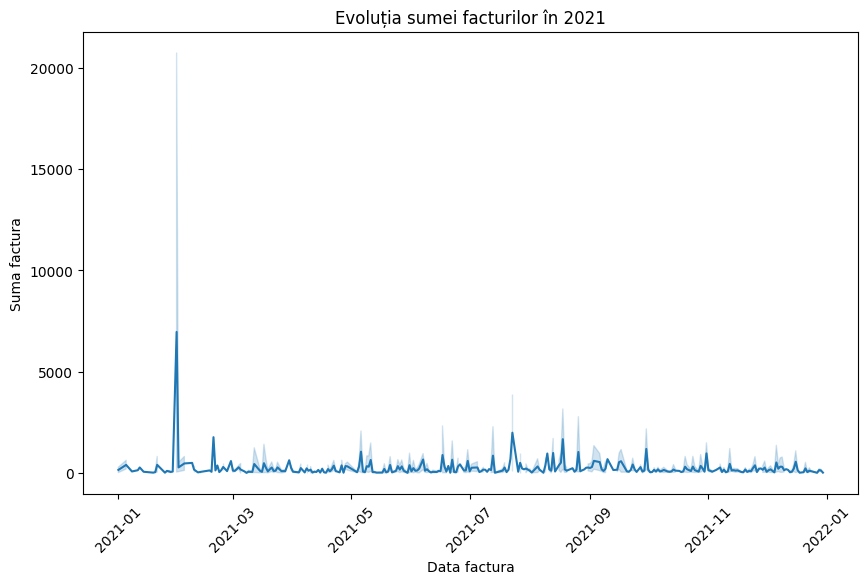

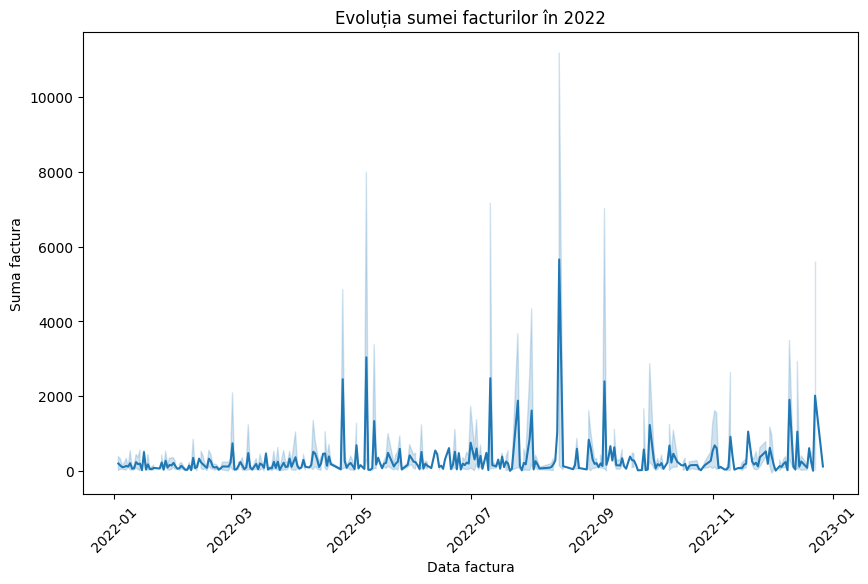

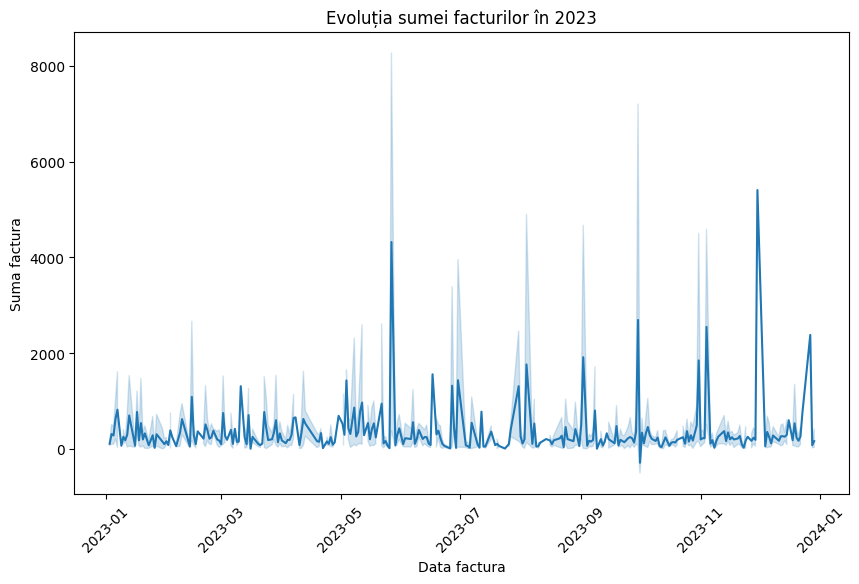

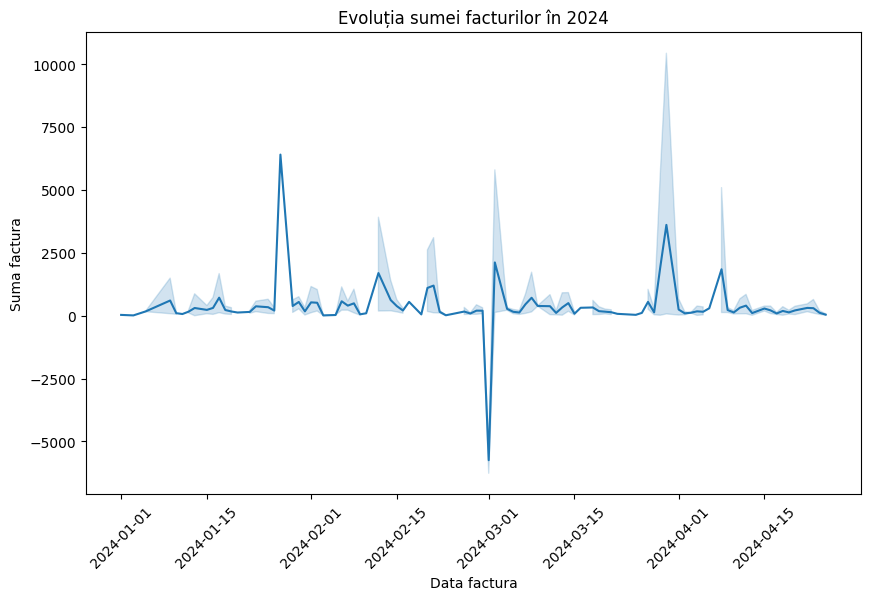

In [ ]:
# Extragem toți anii distinct din coloana 'Data factura'
ani_distincti = df['Data factura'].dt.year.unique()

# Creăm un grafic separat pentru fiecare an
for an in ani_distincti:
    plt.figure(figsize=(10, 6))
    df_an = df[df['Data factura'].dt.year == an]
    sns.lineplot(data=df_an, x='Data factura', y='Suma factura')
    plt.title(f'Evoluția sumei facturilor în {an}')
    plt.xlabel('Data factura')
    plt.ylabel('Suma factura')
    plt.xticks(rotation=45)
    plt.show()


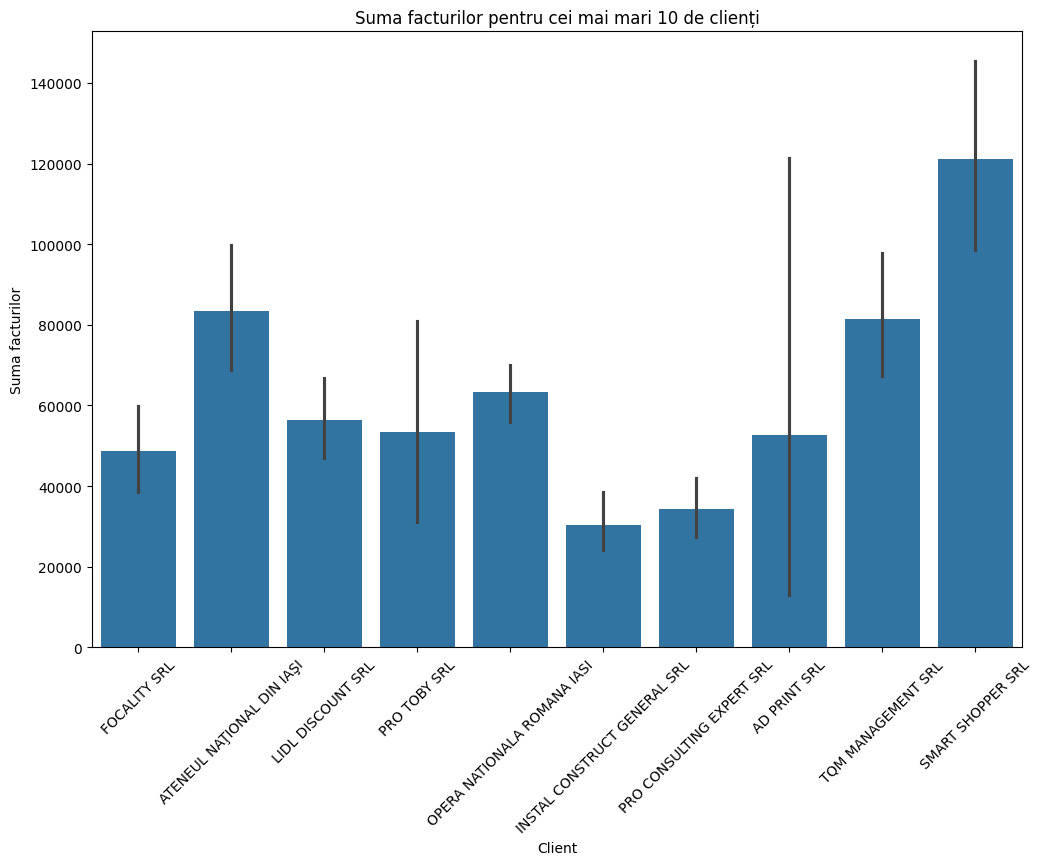

In [ ]:
# Selectăm doar primii 20 de clienți cu cele mai mari sume facturate
top_10_clienti = df.groupby('Client')['Suma factura'].sum().nlargest(10).index

# Filtrăm dataframe-ul pentru a include doar acești clienți
df_top_10_clienti = df[df['Client'].isin(top_10_clienti)]

# Creăm un grafic pentru acești clienți
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_10_clienti, x='Client', y='Suma factura', estimator=sum)
plt.title('Suma facturilor pentru cei mai mari 10 de clienți')
plt.xlabel('Client')
plt.ylabel('Suma facturilor')
plt.xticks(rotation=45)
plt.show()


In [51]:
# Exemplu de pregătire a datelor pentru regresie liniară
X = df[['Baza impozitare', 'Valoare TVA']]
y = df['Suma factura']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 3.652068269258797e-05
R^2 Score: 0.9999999999353562


In [ ]:
# Folosesim modelul pentru a face predicții pentru cererea viitoare
cerere_viitoare_pred = model.predict(df[['Baza impozitare', 'Valoare TVA']])

# Afișează predicțiile pentru cererea viitoare
print(cerere_viitoare_pred)


[ 30.2463276  407.5149875   56.0062359  ...  40.00635701  18.00639941
  96.54624638]


In [ ]:
#import pandas as pd

# Creează un DataFrame pentru predicții și adaugă predicțiile într-o nouă coloană numită 'Predictie'
#df['Predictie'] = cerere_viitoare_pred

# Exportă DataFrame-ul într-un fișier Excel
##df.to_excel('predictii_cerere_viitoare.xlsx', index=False)


In [ ]:
# Selecția primelor 50 de valori prezise și cele reale
primele_50_valori = df[['Predictie', 'Suma factura']].head(50)

# Afișarea într-un tabel
print(primele_50_valori.to_string(index=False))


  Predictie  Suma factura
  30.246328         30.24
 407.514988        407.51
  56.006236         56.00
 270.445474        270.44
 180.005795        180.00
  51.106253         51.10
  45.236274         45.23
1429.501357       1429.50
 371.345116        371.34
  94.006101         94.00
  12.306391         12.30
 195.305741        195.30
  32.856318         32.85
8082.757724       8082.78
 306.305347        306.30
  57.006233         57.00
 771.003696        771.00
  62.006215         62.00
 214.005675        214.00
 245.205564        245.20
 720.003878        720.00
  55.806237         55.80
  34.026314         34.02
 598.254310        598.25
  26.606340         26.60
  58.686226         58.68
 216.005667        216.00
 225.005636        225.00
 321.265294        321.26
   4.806418          4.80
  23.046353         23.04
  15.126381         15.12
 193.505748        193.50
 151.155898        151.15
 124.505992        124.50
   5.766415          5.76
  92.906105         92.90
 491.004691 

<ipython-input-82-64496b6ac1b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Diferenta'] = df_2024['Suma factura'] - df_2024['Predictie']


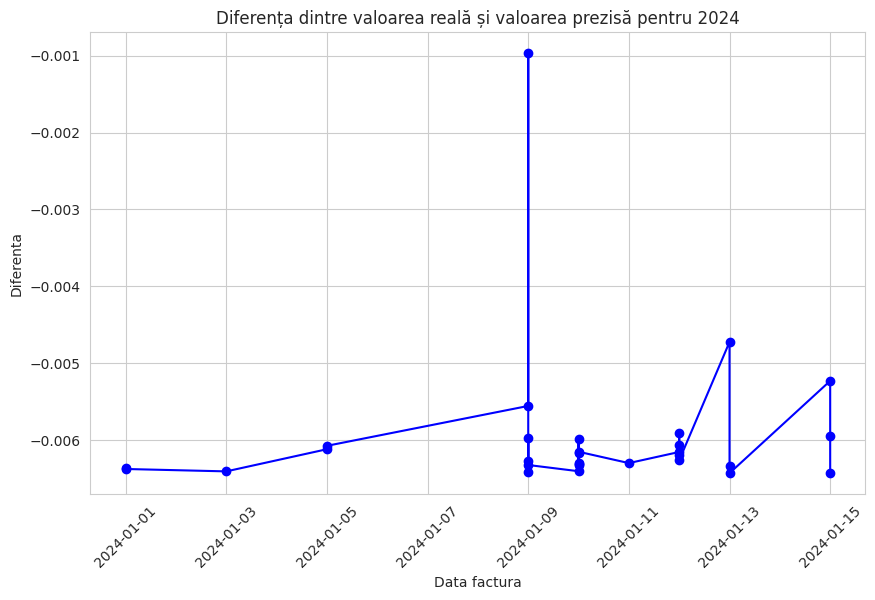

In [82]:
# @title
# Filtrăm înregistrările pentru anul 2024
df_2024 = df[df['An factura'] == 2024]

# Calculăm diferența între valorile reale și cele prezise
df_2024['Diferenta'] = df_2024['Suma factura'] - df_2024['Predictie']

# Creăm un grafic pentru diferența dintre valorile reale și cele prezise pentru primele 20 de înregistrări din 2024
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Data factura'].head(30), df_2024['Diferenta'].head(30), marker='o', color='blue')
plt.title('Diferența dintre valoarea reală și valoarea prezisă pentru 2024')
plt.xlabel('Data factura')
plt.ylabel('Diferenta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [55]:

# Extragem doar datele din anul 2020
df_2020 = df[df['Data factura'].dt.year == 2020]

# Ștergem coloana 'Valoare factura'
df_2020.drop(columns=['Suma factura'], inplace=True)

# Salvăm DataFrame-ul cu datele din 2020 într-un nou fișier CSV
df_2020.to_csv('date_2020.csv', index=False)


<ipython-input-55-98e2d39b0234>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.drop(columns=['Suma factura'], inplace=True)


In [48]:
import pandas as pd

# Încarcă setul de date original din fișierul CSV
df1 = pd.read_csv('date_2020.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nr. factura      430 non-null    int64  
 1   Data factura     430 non-null    object 
 2   Baza impozitare  430 non-null    float64
 3   Valoare TVA      430 non-null    float64
 4   Suma Factura     0 non-null      float64
 5   An factura       430 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.3+ KB


In [54]:
import pandas as pd

# Încărcați noul set de date pentru predicție
df_new = pd.read_csv('date_2020.csv')

# Selecția caracteristicilor pentru predicție (Baza impozitare și Valoare TVA)
X_new = df_new[['Baza impozitare', 'Valoare TVA']]

# Faceți predicții pe baza caracteristicilor folosind modelul antrenat
y_pred = model.predict(X_new)

# Adăugați predicțiile în DataFrame-ul nou
df_new['Predictie'] = y_pred

# Afișați primele 10 linii cu predicții
print(df_new[['Nr. factura', 'Predictie']].head(10))

# Sau salvați predicțiile într-un fișier CSV
df_new[['Nr. factura', 'Predictie']].to_csv('predictii_2020.csv', index=False)


   Nr. factura    Predictie
0        37479   270.305906
1        37493    60.006318
2        37497   164.036114
3        37505  4215.268196
4        37515   397.925657
5        37520   152.846136
6        37527   834.844803
7        37528   102.766234
8        37550    98.006243
9        37615   284.005880


In [68]:
import pandas as pd

# Încărcați noul set de date pentru predicție
df_new2 = pd.read_csv('date_2020.csv')
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nr. factura      430 non-null    int64  
 1   Data factura     430 non-null    object 
 2   Baza impozitare  430 non-null    float64
 3   Valoare TVA      430 non-null    float64
 4   An factura       430 non-null    int64  
 5   Predictie        430 non-null    float64
 6   Diferenta        430 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 23.6+ KB


In [62]:
#schimbam formatul datei pt pandas
df_new2['Data factura'] = pd.to_datetime(df['Data factura'], format='%d.%m.%Y %H:%M:%S')

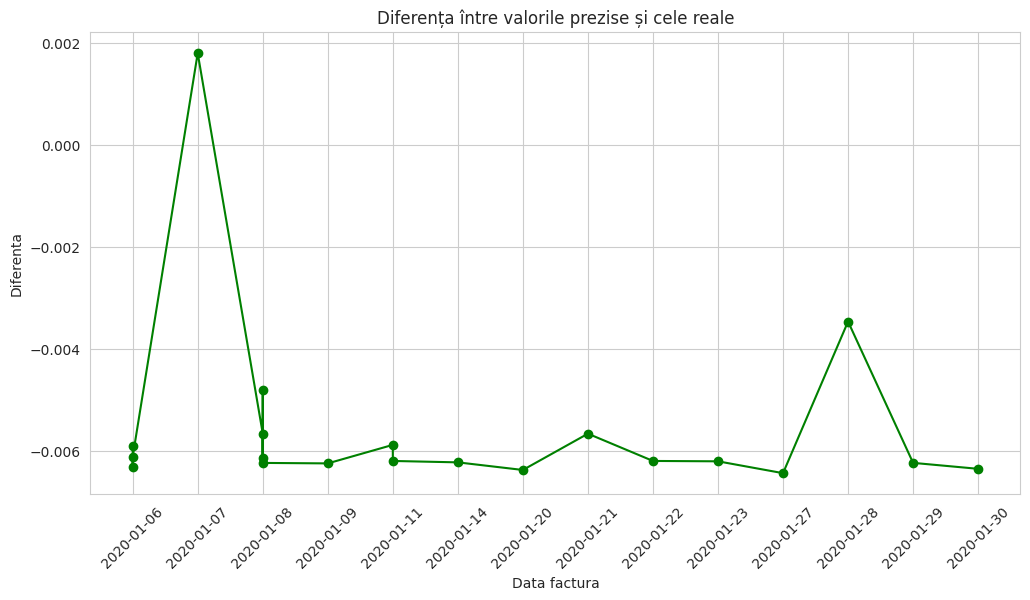

In [72]:
import matplotlib.pyplot as plt

# Filtrăm setul de date pentru a include doar primele 20 de înregistrări
df_new2_subset = df_new2.head(20)
# Setăm dimensiunea figurii
plt.figure(figsize=(12, 6))

# Creăm un grafic de linii pentru diferența dintre valorile prezise și cele reale
plt.plot(df_new2_subset['Data factura'], df_new2_subset['Diferenta'], marker='o', color='green')

# Adăugăm titlul și etichetele axelor
plt.title('Diferența între valorile prezise și cele reale')
plt.xlabel('Data factura')
plt.ylabel('Diferenta')
plt.xticks(rotation=45)

# Afișăm graficul
plt.grid(True)
plt.show()
